# **Time Series Analysis and Forecasting**

> Project Aim:

- To develop a robust time series forecasting model by leveraging various statistical and deep learning techniques, including ARIMA, SARIMA, Prophet, and LSTM, to accurately predict future values of a given time series dataset. This involves analyzing the data's underlying patterns, seasonality, and trends, and evaluating the performance of different models to identify the most effective approach for forecasting. The project aims to provide valuable insights for decision-making by enabling accurate predictions of future trends and patterns.



### **Implementation Steps**
- 1. Importing Required Libraries
- 2. Loads the dataset
- 3. Decomposes time series components
- 4. Applies multiple forecasting models (ARIMA, SARIMA, Prophet, LSTM)
- 5. Predicts the future values

# **1. Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# **2. Loads the dataset**

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/T-Series/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.isnull().sum()

,0
Month,0
#Passengers,0


### **The code plots the time series data of air passenger traffic over time.**

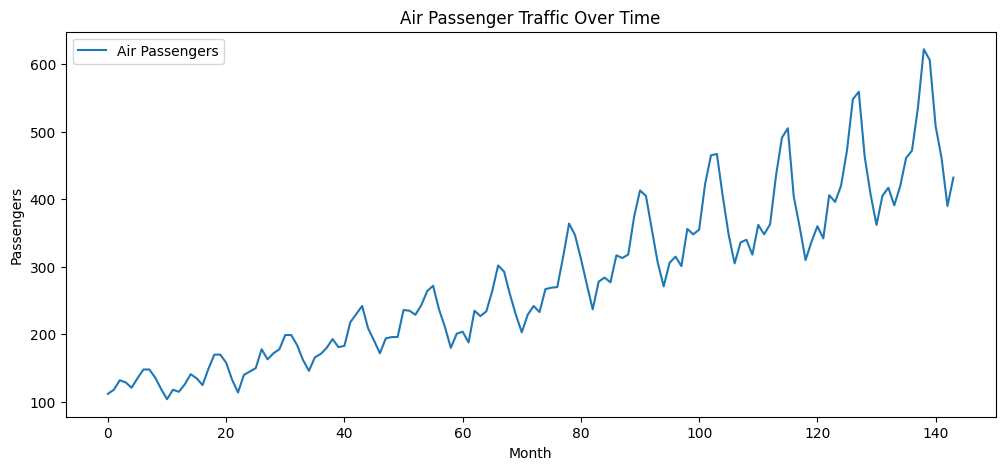

In [ ]:
# Plot time series
plt.figure(figsize=(12,5))
plt.plot(df['#Passengers'], label="Air Passengers") # Access the '#Passengers' column directly
plt.title("Air Passenger Traffic Over Time")
plt.xlabel("Month")  # Assuming 'Month' column represents time
plt.ylabel("Passengers")
plt.legend()
plt.show()

# **3. Decomposes time series components**

> The code decomposes and visualizes the time series data of #Passengers into trend, seasonality, and residuals.



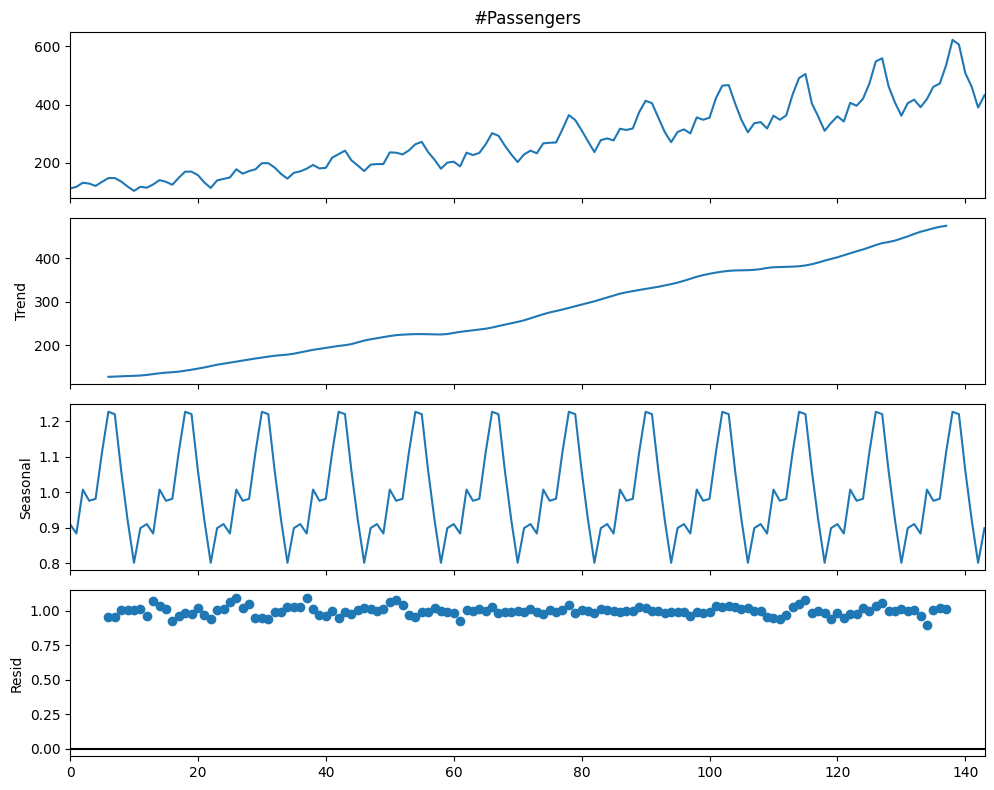

In [ ]:
# Decomposition into Trend, Seasonality, and Residuals
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
plt.rcParams.update({'figure.figsize': (10,8)})
decomposition.plot()
plt.show()

### **The code performs the Augmented Dickey-Fuller test to check if the time series data #Passengers is stationary.**

In [ ]:
# Augmented Dickey-Fuller Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

adf_test(df['#Passengers'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Data is not stationary


### **The code applies differencing to the time series data and re-tests for stationarity.**

In [ ]:
# Differencing if not stationary
df['Passengers_diff'] = df['#Passengers'].diff().dropna()
adf_test(df['Passengers_diff'].dropna())

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Data is not stationary


# **4. Applies multiple forecasting models (ARIMA, SARIMA, Prophet, LSTM)**

> The following code utilizes four different forecasting models to predict future values of the time series data:

- ARIMA: A statistical model for analyzing and forecasting time series data based on past values.

- SARIMA: An extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

- Prophet: A procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

- LSTM: A type of recurrent neural network that is well-suited to processing and predicting time series data with long-range dependencies.



### **(i). ARIMA Model**

In [ ]:
model_arima = ARIMA(df['#Passengers'], order=(2,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 02 May 2025   AIC                           1353.347
Time:                        10:37:01   BIC                           1368.161
Sample:                             0   HQIC                          1359.366
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.814      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### **(ii). SARIMA Model**

In [ ]:
model_sarima = sm.tsa.statespace.SARIMAX(df['#Passengers'], order=(2,1,2), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -503.024
Date:                              Fri, 02 May 2025   AIC                           1020.048
Time:                                      10:37:06   BIC                           1040.174
Sample:                                           0   HQIC                          1028.226
                                              - 144                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4441      0.388      1.145      0.252      -0.316       1.204
ar.L2          0.32

### **(iii). Prophet Model**

In [ ]:
!pip install prophet
from prophet import Prophet # Import the Prophet class

In [ ]:
df_prophet = df.reset_index()
# Assign appropriate column names considering the existing columns
df_prophet.columns = ['index_col', 'ds', 'y', 'Passengers_diff']
prophet_model = Prophet()
prophet_model.fit(df_prophet[['ds', 'y']]) # Fit using only 'ds' and 'y'
future = prophet_model.make_future_dataframe(periods=120, freq='M')
forecast = prophet_model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfqiwzpw/cnzff_bf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfqiwzpw/23krbz1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71526', 'data', 'file=/tmp/tmptfqiwzpw/cnzff_bf.json', 'init=/tmp/tmptfqiwzpw/23krbz1p.json', 'output', 'file=/tmp/tmptfqiwzpw/prophet_modelg0gn3hwh/prophet_model-20250502103725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:37:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

### **(iv). LSTM Model**

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['#Passengers']])

In [ ]:
# Train-Test Split
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled[:train_size], df_scaled[train_size:]

In [ ]:
# Reshape for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import metrics  # Import metrics

model_lstm = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_lstm.compile(optimizer='adam',
                   loss='mse',
                   metrics=[metrics.mae, metrics.RootMeanSquaredError()]) # Add metrics

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train LSTM
model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0958 - mean_absolute_error: 0.2666 - root_mean_squared_error: 0.3092 - val_loss: 0.3199 - val_mean_absolute_error: 0.5467 - val_root_mean_squared_error: 0.5656
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.1808 - root_mean_squared_error: 0.2259 - val_loss: 0.1001 - val_mean_absolute_error: 0.2809 - val_root_mean_squared_error: 0.3163
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.1081 - root_mean_squared_error: 0.1369 - val_loss: 0.0224 - val_mean_absolute_error: 0.1171 - val_root_mean_squared_error: 0.1495
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.1081 - root_mean_squared_error: 0.1246 - val_loss: 0.0692 - val_mean_absolute_error: 0.2183 - val_root_mean_squared_error: 0.2630
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0813 - root_mean_squared_error: 0.

In [ ]:
# Predict Future Values
future_predictions = []
input_seq = X_test[-1].reshape(1, seq_length, 1)

for _ in range(120):  # Predict next 10 years (120 months)
    pred = model_lstm.predict(input_seq)[0]
    future_predictions.append(pred)
    input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

# **5. Predicts the future values**

### **(i).Plot Prophet Forecast**

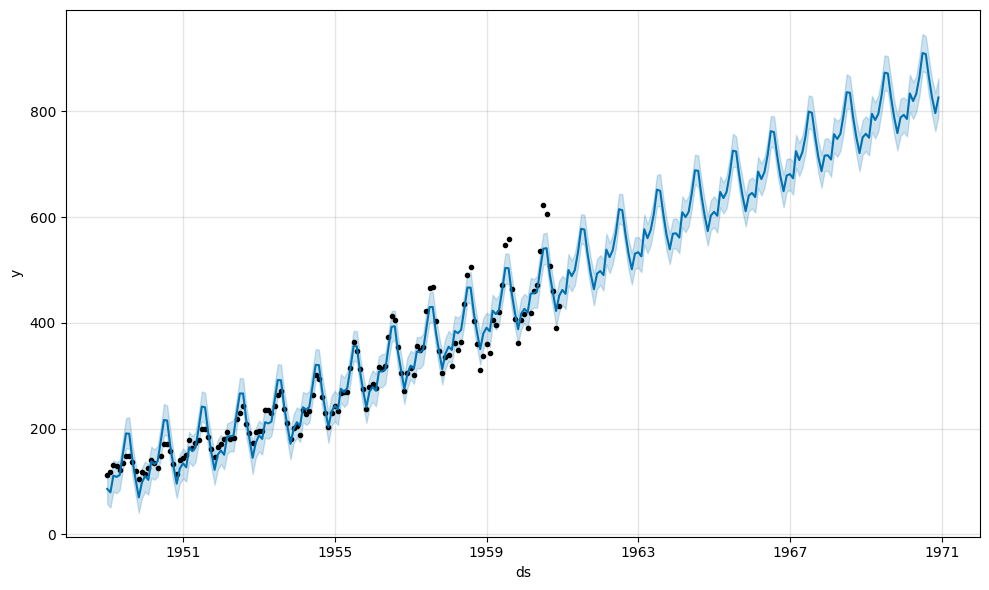

In [ ]:
prophet_model.plot(forecast)
plt.show()

### **(ii). Plot LSTM Predictions**

> The code plots the actual values and the LSTM model's predictions for the time series data for 10 years.



<ipython-input-29-b99ee8589fc3>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=120, freq='M'), future_predictions, label="LSTM Forecast", linestyle='dashed')


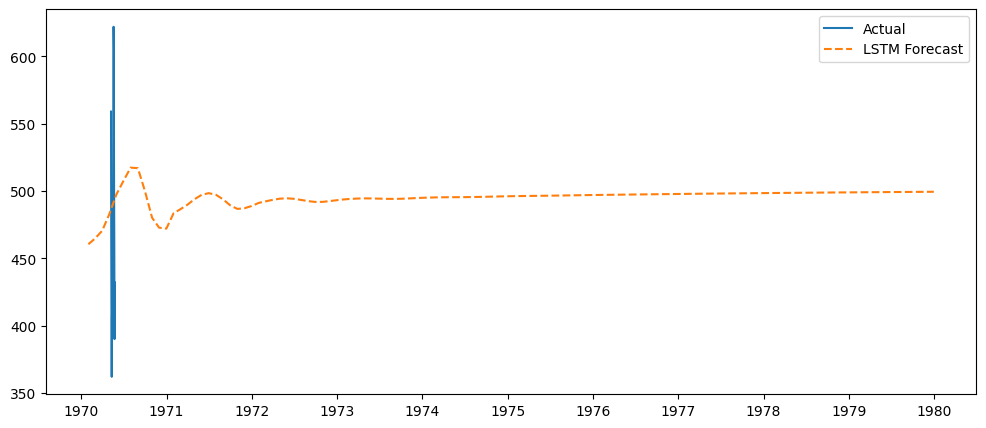

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(pd.date_range(df.index[-1], periods=120, freq='M'), future_predictions, label="LSTM Forecast", linestyle='dashed')
plt.legend()
plt.show()

### **Steps**
1. **Loads & Visualizes Data** – Reads `AirPassengers.csv`, sets date as index, and plots the time series.
2. **Time Series Decomposition** – Splits data into trend, seasonality, and irregular components.
3. **Stationarity Test** – Uses Augmented Dickey-Fuller test to check stationarity.
4. **ARIMA Model** – Fits an ARIMA model and prints results.
5. **SARIMA Model** – Accounts for seasonality with a SARIMA model.
6. **Facebook Prophet Model** – Uses Prophet for long-term forecasting.
7. **LSTM Deep Learning Model** – Scales data, prepares sequences, and trains an LSTM model to predict future values.

---

### **Predictions**
- **ARIMA & SARIMA:** Statistical models useful for short-term forecasts.
- **Prophet:** Handles seasonality well and provides long-term trends.
- **LSTM:** Uses deep learning for complex patterns and long-term forecasting.

# *************************************************************************

# **About Me:-**
## **Name - Aatish Kumar Baitha**
  - **M.Tech(Data Science)**
- ***YouTube***
  - https://www.youtube.com/@EngineeringWithAatish/playlists
- ***My Linkedin Profile***
  - https://www.linkedin.com/in/aatish-kumar-baitha-ba9523191
- ***My Blog***
  - https://computersciencedatascience.blogspot.com/
- ***My Github Profile***
  - https://github.com/Aatishkb
- ***My Orcid Id***
  - https://orcid.org/0009-0006-1696-7576

# *************************************************************************

# **Thank you!**